<a href="https://colab.research.google.com/github/samarth-web/Automation_LangChain/blob/main/poster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

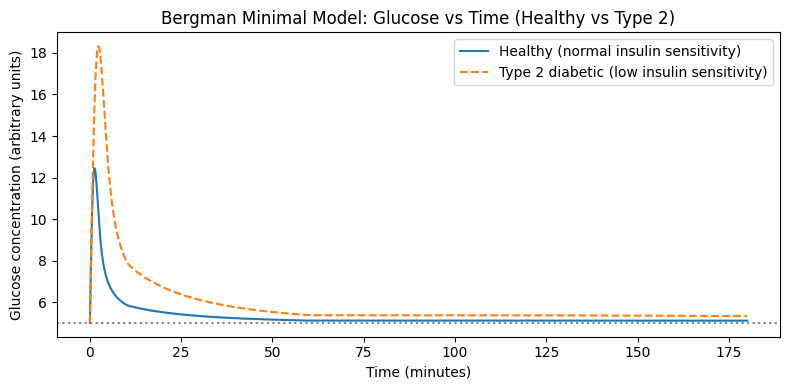

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Gb = 5.0
Ib = 10.0

k1 = 0.02
k2 = 0.03

k3_healthy = 0.05
k3_diabetic = 0.015

meal_size = 10.0
alpha = 0.03

t_start = 0.0
t_end = 180.0
t_eval = np.linspace(t_start, t_end, 1000)

def D_of_t(t):
    return meal_size * np.exp(-alpha * t)

def I_of_t(t):
    if t < 10:
        return Ib + 20.0
    elif t < 60:
        return Ib + 10.0
    else:
        return Ib

def bergman_ode(t, y, params):
    G, X = y
    k1 = params["k1"]
    k2 = params["k2"]
    k3 = params["k3"]
    Gb = params["Gb"]
    Ib = params["Ib"]

    D_t = D_of_t(t)
    I_t = I_of_t(t)

    dGdt = -k1 * (G - Gb) - X * (G - Gb) + D_t
    dXdt = -k2 * X + k3 * (I_t - Ib)

    return [dGdt, dXdt]

def run_simulation(k3_value):
    params = {
        "k1": k1,
        "k2": k2,
        "k3": k3_value,
        "Gb": Gb,
        "Ib": Ib,
    }

    G0 = Gb
    X0 = 0.0
    y0 = [G0, X0]

    sol = solve_ivp(
        fun=lambda t, y: bergman_ode(t, y, params),
        t_span=(t_start, t_end),
        y0=y0,
        t_eval=t_eval,
        method="RK45"
    )

    return sol.t, sol.y[0], sol.y[1]

t, G_healthy, X_healthy = run_simulation(k3_healthy)
_, G_diabetic, X_diabetic = run_simulation(k3_diabetic)

plt.figure(figsize=(8, 4))
plt.plot(t, G_healthy, label="Healthy (normal insulin sensitivity)")
plt.plot(t, G_diabetic, '--', label="Type 2 diabetic (low insulin sensitivity)")
plt.axhline(Gb, color='grey', linestyle=':')
plt.xlabel("Time (minutes)")
plt.ylabel("Glucose concentration (arbitrary units)")
plt.title("Bergman Minimal Model: Glucose vs Time (Healthy vs Type 2)")
plt.legend()
plt.tight_layout()
plt.show()
